In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [2]:
import matplotlib

print("Matplotlib version:", matplotlib.__version__)

Matplotlib version: 3.7.1


## Digit Classification

In [21]:
#importing libraries.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [8]:
#loading dataset from the keras library mnist dataset.
(X_train , Y_train) , (X_test , Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [9]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [11]:
#shape of the each image.
print(X_train[0].shape)

(28, 28)


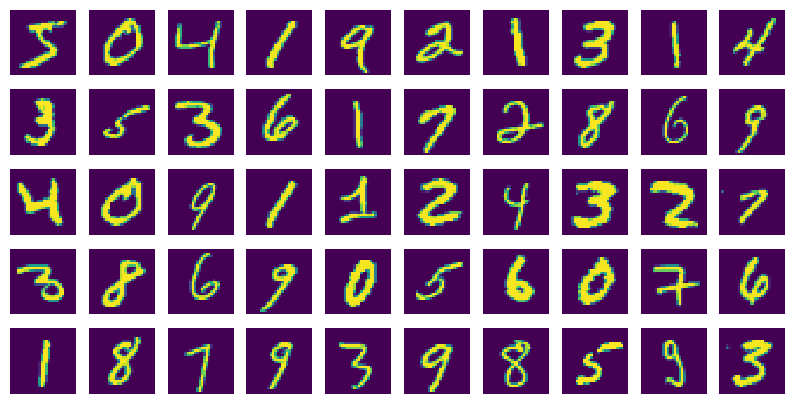

In [18]:
#printing the first 50 images.
fig , ax = plt.subplots(nrows=5 , ncols=10 , figsize=(10 , 5))

for i, ax in enumerate(ax.flatten()):
    ax.matshow(X_train[i])
    ax.axis('off')

# plt.tight_show()
plt.show()

In [19]:
len(X_train)

60000

In [27]:
#converting the X_train and X_test values from 3D to 2D.
X_train_flat=X_train.reshape(len(X_train) , 28*28)
#print(X_train_flat.shape)

X_test_flat=X_test.reshape(len(X_test) , 28*28)

In [28]:
#scaling the X_train and X_test values.

scaler = StandardScaler()

scaler.fit(X_train_flat)
X_train_scaler=scaler.transform(X_train_flat)
X_test_scaler=scaler.transform(X_test_flat)

In [32]:
print(X_train_scaler[0].shape)

(784,)


In [110]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [235]:
#building neural network.
#setting random seed.
tf.random.set_seed(1234)
model = keras.models.Sequential([
    tf.keras.Input(shape=(784, )),
    Dense(50 , activation='relu' , kernel_regularizer=regularizers.l2(0.01)),
    Dense(10 , activation='linear', kernel_regularizer=regularizers.l2(0.01))
])

In [236]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 50)                39250     
                                                                 
 dense_89 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [237]:
#training the model with iterations=10.

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history=model.fit(X_train_scaler , Y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.6757 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4937 - accuracy: 0.9312
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4868 - accuracy: 0.9330
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4851 - accuracy: 0.9338
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4787 - accuracy: 0.9340
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4788 - accuracy: 0.9343
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4777 - accuracy: 0.9340
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4730 - accuracy: 0.9350
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4733 - accuracy: 0.9355
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.47

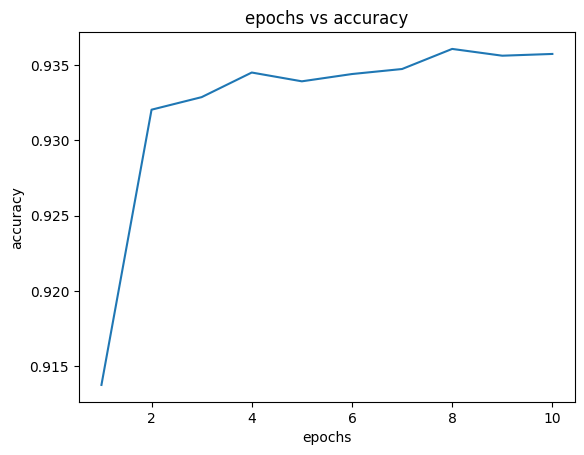

In [161]:
#epochs vs accuracy.
accuracy= history.history['accuracy']
epochs=range(1, 11)

plt.plot(epochs , accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('epochs vs accuracy')
plt.show()

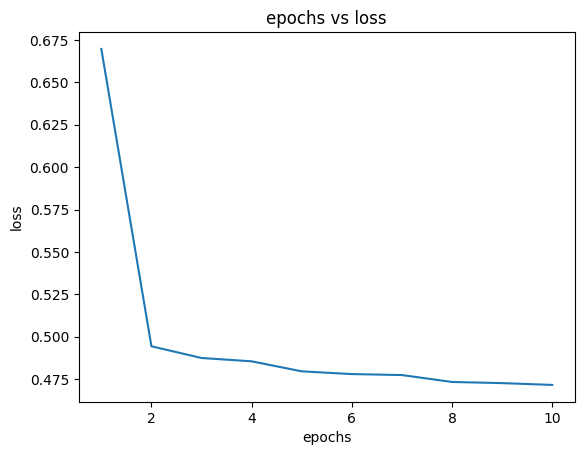

In [162]:
#epochs vs loss.
loss= history.history['loss']
epochs=range(1, 11)

plt.plot(epochs , loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epochs vs loss')
plt.show()

In [163]:
#predicting a image using the model.

predict=model.predict(X_train[1].reshape(1, 784))
predict_p=tf.nn.softmax(predict)
y_predict=np.argmax(predict_p)

print(f'{Y_train[1]},{y_predict}')

1/1 [==============================] - 0s 67ms/step
0,0


1/1 [==============================] - 0s 23ms/step


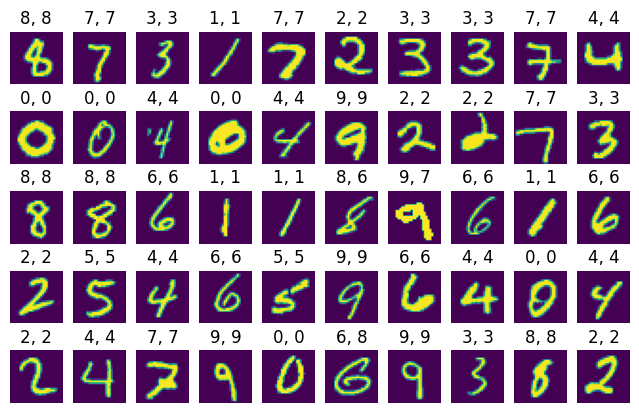

In [164]:
#predicting random 50 images using the trained model.
m ,n=X_train_scaler.shape
fig, ax = plt.subplots(5, 10, figsize=(8, 5))

for i, axis in enumerate(ax.flatten()):
    random_index=np.random.randint(m)
    axis.imshow(X_train[random_index])
    
    #predict the image using the model.
    predict=model.predict(X_train_scaler[random_index].reshape(1, 784))
    predict_p=tf.nn.softmax(predict)
    y_predict=np.argmax(predict_p)
    
    #set_title for each image.
    axis.set_title(f'{Y_train[random_index]}, {y_predict}')
    axis.set_axis_off()

plt.show()

### accuracy and loss for the test set.

In [165]:
#standard scaling the test set and reshape (10000, 784)
X_test_reshape=X_test.reshape(len(X_test), 784)

X_test_scaler=scaler.transform(X_test_reshape)

#print(X_test_scaler[0])

In [166]:
test_loss , test_accuracy= model.evaluate(X_test_scaler ,Y_test)

print(f'Test loss:{test_loss}, Test accuracy:{test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.9359
Test loss:0.46939414739608765, Test accuracy:0.9358999729156494


In [122]:
print(loss , test_loss)

[0.6425617933273315, 0.48767876625061035, 0.4776913821697235, 0.4741743505001068, 0.4702052175998688, 0.46948158740997314, 0.4699946939945221, 0.467574805021286, 0.46737539768218994, 0.4664582908153534, 0.46660298109054565, 0.4645797610282898, 0.4653084874153137, 0.4651249349117279, 0.4642198383808136, 0.4639260470867157, 0.4620681703090668, 0.4637909531593323, 0.4628318250179291, 0.46250781416893005, 0.46195513010025024, 0.4621661603450775, 0.4611579179763794, 0.4628242254257202, 0.4609137773513794, 0.461856484413147, 0.4609948992729187, 0.46123528480529785, 0.461367666721344, 0.4607078433036804, 0.4608311951160431, 0.461467981338501, 0.46017318964004517, 0.4606792628765106, 0.46011170744895935, 0.46086087822914124, 0.4594841003417969, 0.46040523052215576, 0.4603835642337799, 0.45980867743492126, 0.46138399839401245, 0.45990410447120667, 0.4592227339744568, 0.45927149057388306, 0.4586448669433594, 0.46078822016716003, 0.4598800837993622, 0.4591734707355499, 0.4599737226963043, 0.45829

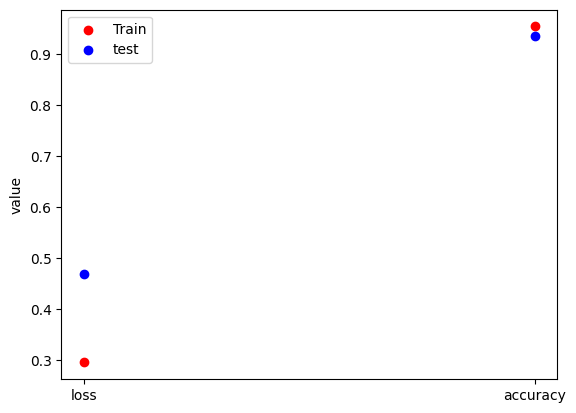

In [280]:
#test_accuracy , train_accuracy and test_loss , train_loss.
x1=[1]
x2=[2]
plt.scatter(x1 , loss[-1], color='red' , label='Train')
plt.scatter(x1 , test_loss ,color='blue' , label='test')
plt.scatter(x2 , accuracy[-1], color='red' )
plt.scatter(x2 , test_accuracy , color='blue' )


plt.xticks([1, 2], ['loss' , 'accuracy'])
plt.xlabel('')
plt.legend()
plt.ylabel('value')
plt.show()

## neural network with hidden layers.

In [148]:
# X_train_max = X_train_flat/255

In [268]:
#model with hidden layers.
model2=keras.models.Sequential([
    tf.keras.Input(shape=(784 , )),
    Dense(50 , activation='relu' , kernel_regularizer=regularizers.l2(0.01)),
    Dense(25, activation='relu' , kernel_regularizer=regularizers.l2(0.01)),
    Dense(10 , activation='sigmoid')
])

In [269]:
#traning the model.
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

hist=model2.fit(X_train_scaler , Y_train ,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6721 - accuracy: 0.9119
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3992 - accuracy: 0.9410
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3615 - accuracy: 0.9460
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3442 - accuracy: 0.9481
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3270 - accuracy: 0.9498
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3194 - accuracy: 0.9520
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.9518
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9524
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.9535
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.295

In [275]:
#model evaluation using test set.
model2.evaluate(X_test_scaler, Y_test)

Y_test_linear=model.predict(X_test_scaler)
Y_test_predict=[np.argmax(i) for i in Y_test_linear]

313/313 [==============================] - 1s 2ms/step


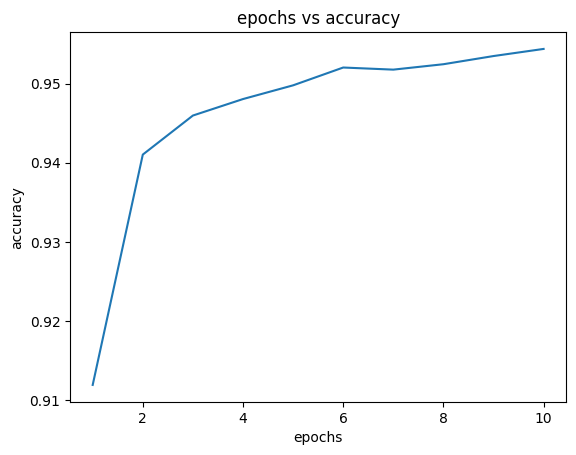

In [276]:
#epochs vs accuracy.
accuracy= hist.history['accuracy']
epochs=range(1, 11)

plt.plot(epochs , accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('epochs vs accuracy')
plt.show()

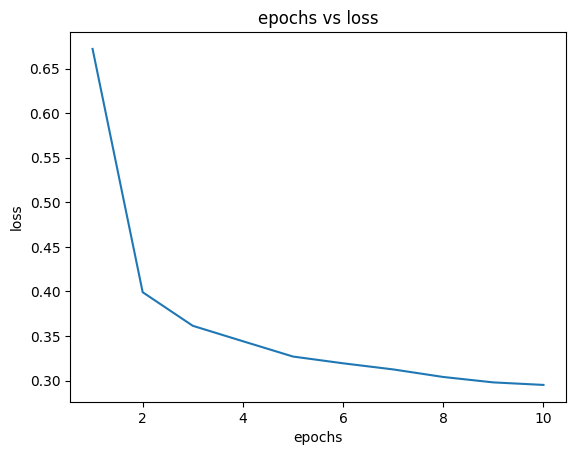

In [277]:
#epochs vs loss.
loss= hist.history['loss']
epochs=range(1, 11)

plt.plot(epochs , loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epochs vs loss')
plt.show()

1/1 [==============================] - 0s 17ms/step


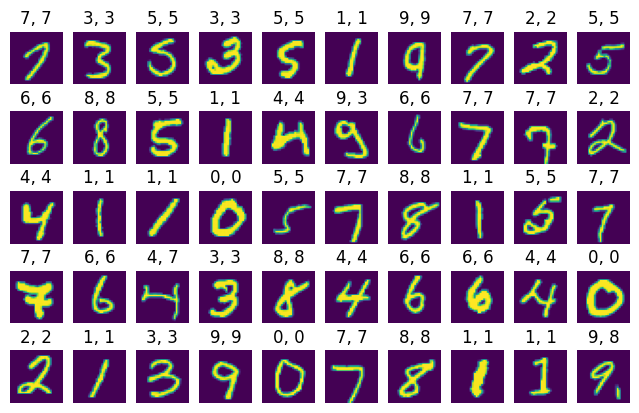

In [278]:
#predicting random 50 images using the trained model.
m ,n=X_train_scaler.shape
fig, ax = plt.subplots(5, 10, figsize=(8, 5))

for i, axis in enumerate(ax.flatten()):
    random_index=np.random.randint(m)
    axis.imshow(X_train[random_index])
    
    #predict the image using the model.
    predict=model2.predict(X_train_scaler[random_index].reshape(1, 784))
    predict_p=tf.nn.softmax(predict)
    y_predict=np.argmax(predict_p)
    
    #set_title for each image.
    axis.set_title(f'{Y_train[random_index]}, {y_predict}')
    axis.set_axis_off()

plt.show()

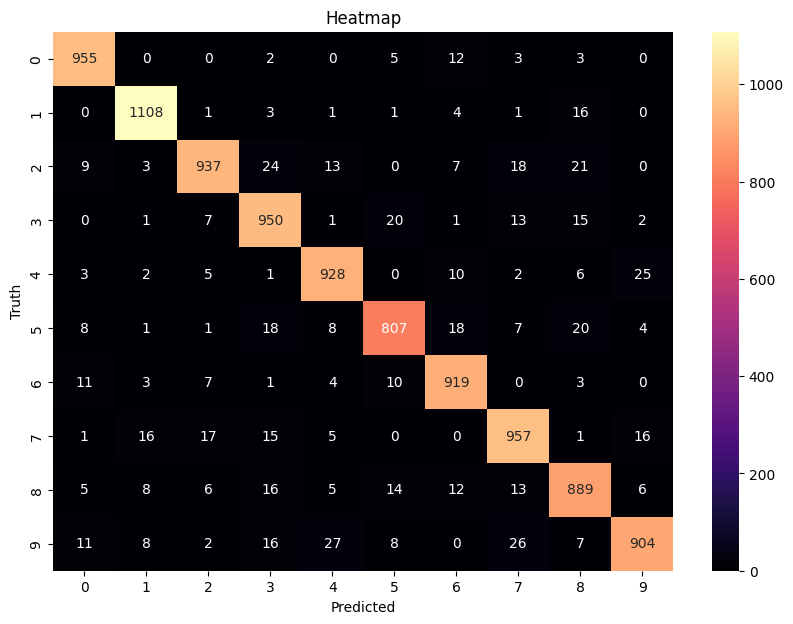

In [279]:
#confusion matrix on test set.
cm=tf.math.confusion_matrix(labels=Y_test , predictions=Y_test_predict)
cm
import seaborn as sn
plt.figure(figsize=(10 , 7))
sn.heatmap(cm ,cmap='magma', annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Heatmap')
plt.show()